               10KB   1MB
Python       15.625   375
MapReduce  2360.000  4180


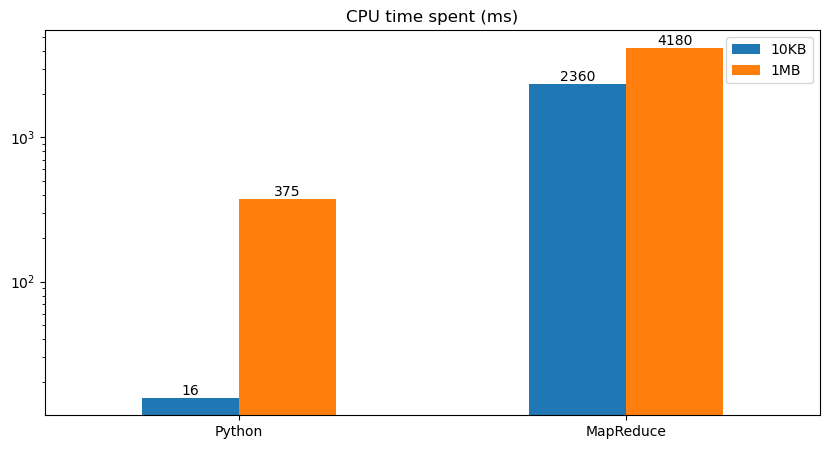

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../python')
from letterFrequency import process_file

run_id = 1
file_dims = ['10KB', '1GB', '100MB', '1MB']
df = pd.DataFrame(index=['Python', 'MapReduce'], columns=file_dims)
df = df.fillna(0)

for dim in file_dims:
    total_time = process_file(dim)
    df.loc['Python', dim] = total_time
    mr_file_path = f'../resources/performance_analysis/output_{run_id}_inmappercombiner_1/{dim}/log.txt'
    with open(mr_file_path, 'r') as file:
        for line in file:
            if 'CPU time spent (ms)' in line:
                line = line.split('=')
                df.loc['MapReduce', dim] += float(line[1].strip())
print(df)
ax = df.plot(kind='bar', figsize=(10, 5), title='CPU time spent (ms)', rot=0)
ax.set_yscale('log')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()